# 🧩 Notebook-15: Time-Series Visualization

In [1]:
# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# 🛠️ Add utils to path
PROJECT_ROOT = Path.cwd().parent
UTILS_DIR = PROJECT_ROOT / "utils"
if str(UTILS_DIR) not in sys.path:
    sys.path.insert(0, str(UTILS_DIR))

from plot_utils import (
    plot_timeseries_trend,
    save_timeseries_trend,
    plot_rolling_mean_std,
    save_rolling_stats_plot,
    plot_multi_product_timeseries,
    save_multi_product_timeseries
)

print("📆 Time-Series Visualization — Revenue Trends, Rolling Stats, and Multi-Product Views")


📆 Time-Series Visualization — Revenue Trends, Rolling Stats, and Multi-Product Views


In [2]:
# 🧹 Load sales data
df = pd.read_csv(PROJECT_ROOT / "datasets" / "sales_data.csv")

# 🕒 Convert Month to datetime and set as index
df["Month"] = pd.to_datetime(df["Month"])
df = df.sort_values("Month")
df.set_index("Month", inplace=True)

# 🧪 Preview
df.head()


,Product,Units Sold,Revenue
Month,,,
2023-01-01,Laptop,152,176320
2023-01-01,Tablet,64,91520
2023-01-01,Smartphone,121,162624
2023-01-01,Monitor,152,63992
2023-02-01,Laptop,124,47988


/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:963: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/mp_py_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


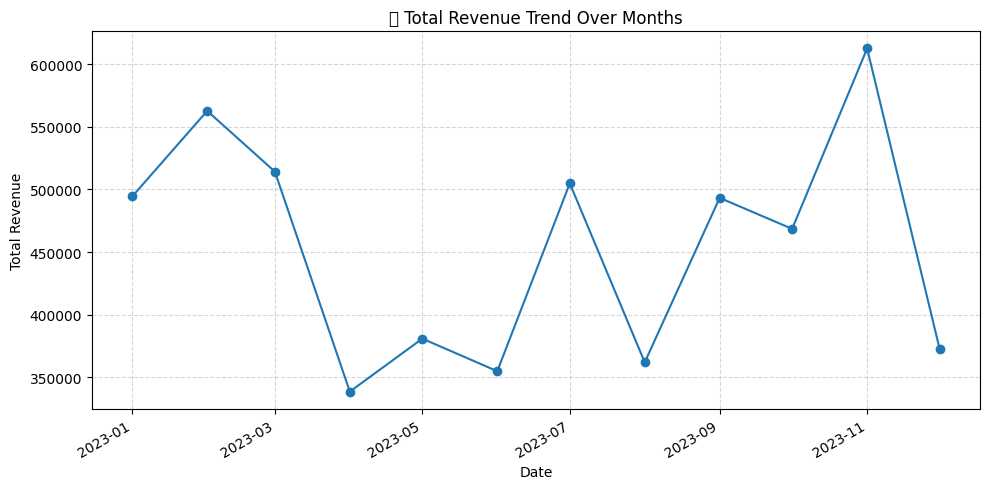

In [3]:
# 📈 2. Basic Trend — Monthly Revenue Line Plot
monthly_revenue = df.groupby(df.index)["Revenue"].sum()
plot_timeseries_trend(
    x=monthly_revenue.index,
    y=monthly_revenue.values,
    ylabel="Total Revenue",
    title="📈 Total Revenue Trend Over Months"
)

# 💾 Export Revenue Trend
export_dir = PROJECT_ROOT / "exports" / "timeseries_plots"
export_dir.mkdir(parents=True, exist_ok=True)

save_timeseries_trend(
    x=monthly_revenue.index,
    y=monthly_revenue.values,
    path=export_dir / "monthly_revenue_trend.png"
)


/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:1003: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/mp_py_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


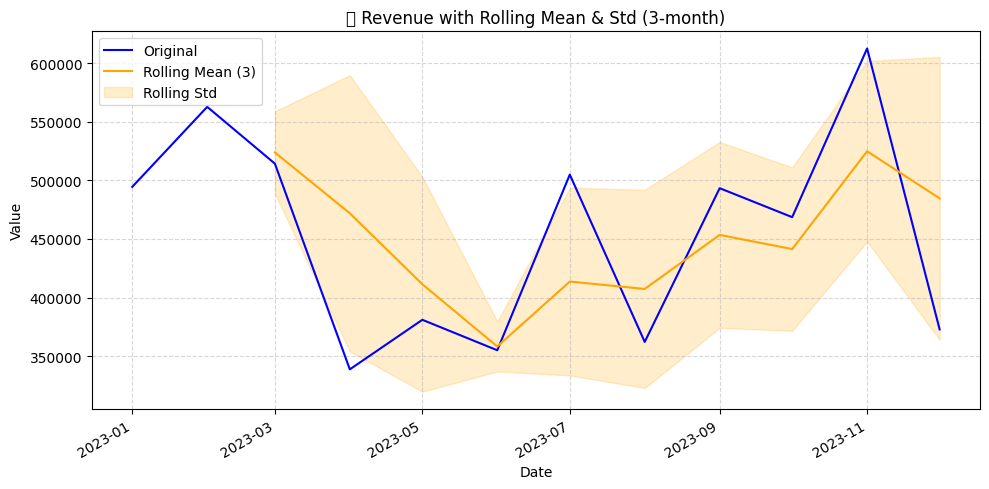

In [4]:
# 🔄 3. Rolling Mean & Std
plot_rolling_mean_std(
    series=monthly_revenue,
    window=3,
    title="📉 Revenue with Rolling Mean & Std (3-month)"
)

# 💾 Export Rolling Stats
save_rolling_stats_plot(
    series=monthly_revenue,
    window=3,
    path=export_dir / "rolling_mean_std_revenue.png"
)

/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/utils/plot_utils.py:1046: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/satvikpraveen/Desktop/Libraries/MatplotlibMasterPro/mp_py_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


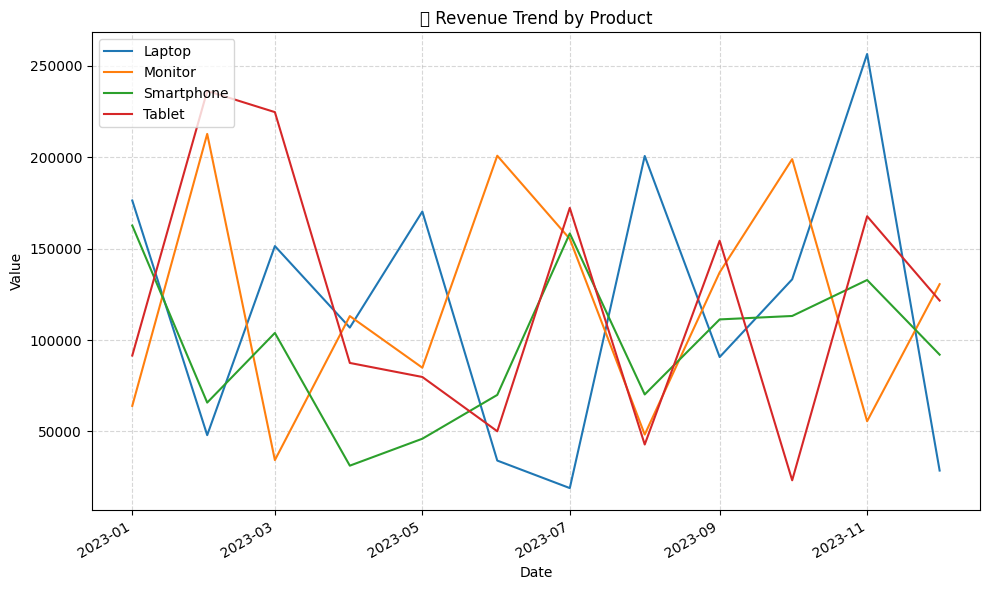

In [5]:
# 📊 4. Multiple Time-Series — Revenue per Product
multi_product_df = df.groupby(["Month", "Product"])["Revenue"].sum().unstack().fillna(0)
plot_multi_product_timeseries(
    df=multi_product_df,
    title="📊 Revenue Trend by Product"
)

# 💾 Export Multi-Product Plot
save_multi_product_timeseries(
    df=multi_product_df,
    path=export_dir / "revenue_per_product.png"
)


## ✅ Summary
- Drew simple trend lines for time-series
- Added rolling average and std deviation overlays
- Compared product-wise time-series in one chart
- Exported all plots to exports/timeseries_plots/ directory